In [1]:
import h5py
import pickle 
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
filename1=('/project/rpp-chime/chime/chime_processed/holography/holo_stack/CygA/CYG_A_20181017T021625_to_20191016T022121.h5')
f1 = h5py.File(filename1,'r') 
freqs = f1['index_map']["freq"][()]
lst=[]
angle = f1['index_map']["pix"][()]
for i in angle:
    x=i[1]
    lst.append(x)
#print(len(lst))
frequencies=list(range(1024))
feeds=list(range(2048))
print(np.shape(frequencies))
print(np.shape(feeds))

(1024,)
(2048,)


In [2]:
np.shape(f1['beam'][()])

(1024, 2, 2048, 720)

In [3]:
freq600 = f1['index_map']["freq"][938]
print(freq600)

433.59375


In [4]:
FFF=[]
for j in feeds:
    #YES=[]
    freq600 = f1['index_map']["freq"][938]
    #print(freq600)
    yy600=f1['beam'][938,0,j]
    max_y = max(yy600)
    if max_y==0:
        FFF.append(None)
    else:
        max_index=np.where(yy600 == max_y)
        number= max_index[0][0] # This is the index of maximum y value in the list. Peak value of y.
            #print(number)
        xmax = lst[number]
        FFF.append((xmax))

            #print(x1_half)
            #print(x2_half)
            #print(FWHM)
    #FFF.append(YES)
print(np.shape(FFF))
#print(FFF)

(2048,)


Text(0.5, 1.0, '433.59375 MHz')

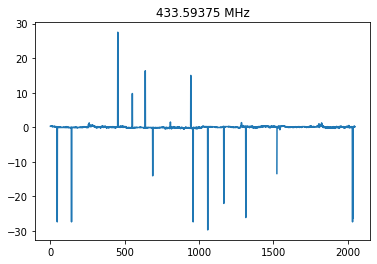

In [5]:
plt.plot(FFF)
plt.title('433.59375 MHz')

In [6]:
xyz=np.array(FFF, dtype=np.float)
ddd=[]
for i in xyz:
    if (np.abs(i)<1):
        ddd.append(i)
    else:
        ddd.append(np.nan)
#print(ddd)

/tmp/ipykernel_197477/755953450.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xyz=np.array(FFF, dtype=np.float)


In [7]:
with open('Beam_offset_CygA_433', 'wb') as f: 
        pickle.dump(ddd, f) 

(2048,)

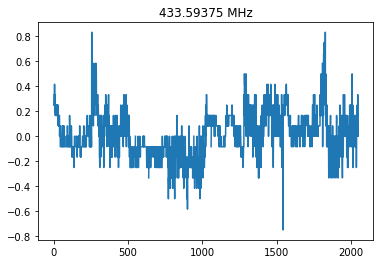

In [8]:
plt.plot((ddd))
plt.title('433.59375 MHz')
np.shape(ddd)

(256,)
(256,)
(256,)
(256,)


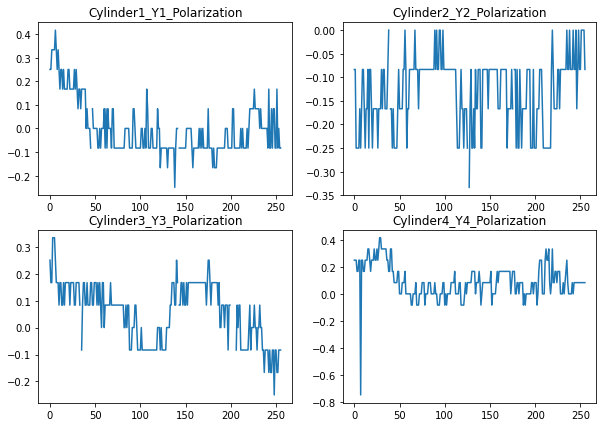

In [9]:
Y1= ddd[0:256]
Y2= ddd[512:768]
Y3= ddd[1024:1280]
Y4= ddd[1536:1792]
print(np.shape(Y1))
print(np.shape(Y2))
print(np.shape(Y3))
print(np.shape(Y4))

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.title("Cylinder1_Y1_Polarization")
plt.plot((Y1))
#plt.show()


fig.add_subplot(2,2,2)
plt.title("Cylinder2_Y2_Polarization")
plt.plot((Y2))
#plt.show()

fig.add_subplot(2,2,3)
plt.title("Cylinder3_Y3_Polarization")
plt.plot((Y3))
#plt.show()

fig.add_subplot(2,2,4)
plt.title("Cylinder4_Y4_Polarization")
plt.plot((Y4))
#plt.show()

In [10]:
Y_pol = np.concatenate((Y1, Y2,Y3,Y4))
print(np.shape(Y_pol))

(1024,)


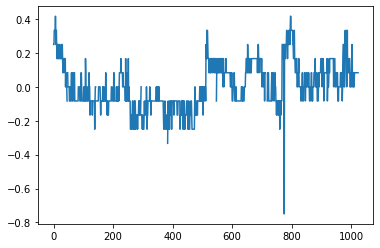

In [11]:
plt.plot(Y_pol)

(256,)
(256,)
(256,)
(256,)


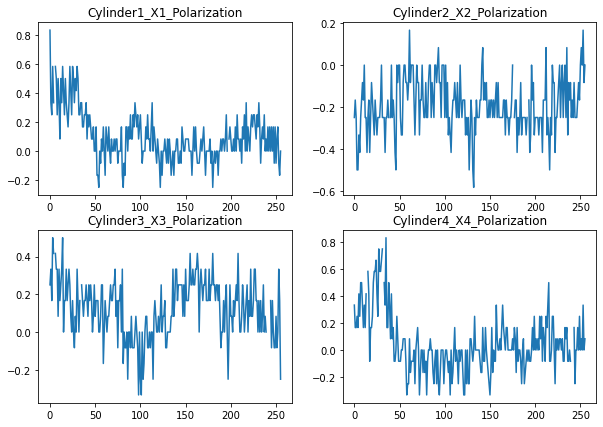

In [12]:
X1= ddd[256:512]
X2= ddd[768:1024]
X3= ddd[1280:1536]
X4= ddd[1792:2048]
print(np.shape(X1))
print(np.shape(X2))
print(np.shape(X3))
print(np.shape(X4))

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.title("Cylinder1_X1_Polarization")
plt.plot((X1))
#plt.show()


fig.add_subplot(2,2,2)
plt.title("Cylinder2_X2_Polarization")
plt.plot((X2))
#plt.show()

fig.add_subplot(2,2,3)
plt.title("Cylinder3_X3_Polarization")
plt.plot((X3))
#plt.show()

fig.add_subplot(2,2,4)
plt.title("Cylinder4_X4_Polarization")
plt.plot((X4))
#plt.show()

In [13]:
X_pol = np.concatenate((X1, X2,X3,X4))
print(np.shape(X_pol))

(1024,)


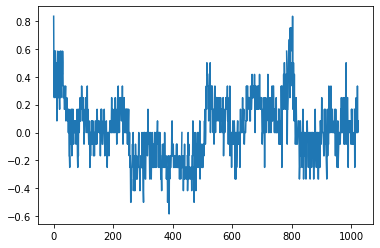

In [14]:
plt.plot(X_pol)

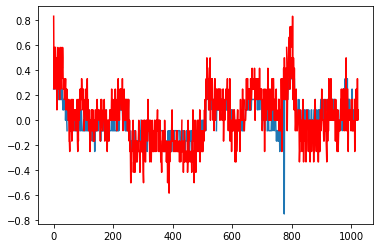

In [15]:
plt.plot(Y_pol)
plt.plot(X_pol,"red")

In [16]:
bad_pol = ~np.logical_or(np.isnan(X_pol), np.isnan(Y_pol))

X_nan=np.compress(bad_pol, X_pol)  
Y_nan=np.compress(bad_pol, Y_pol) 

relation=np.corrcoef(X_nan,Y_nan)[1,0]
print(relation)

0.664117693449335


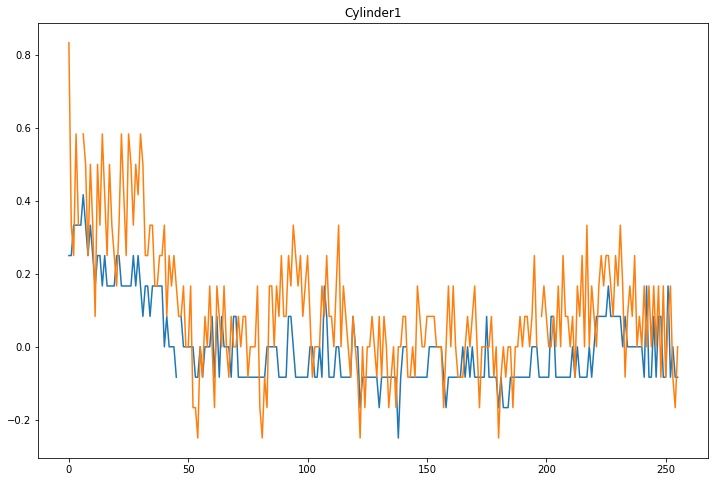

In [17]:
plt.figure(figsize=(12,8))
plt.title("Cylinder1")
plt.plot(range(256),(Y1))
plt.plot(range(256),(X1))

In [18]:
bad_cyl1 = ~np.logical_or(np.isnan(X1), np.isnan(Y1))

X1_nan=np.compress(bad_cyl1, X1)  
Y1_nan=np.compress(bad_cyl1, Y1) 

relation1=np.corrcoef(X1_nan,Y1_nan)[1,0]
print(relation1)

0.6695142674531719


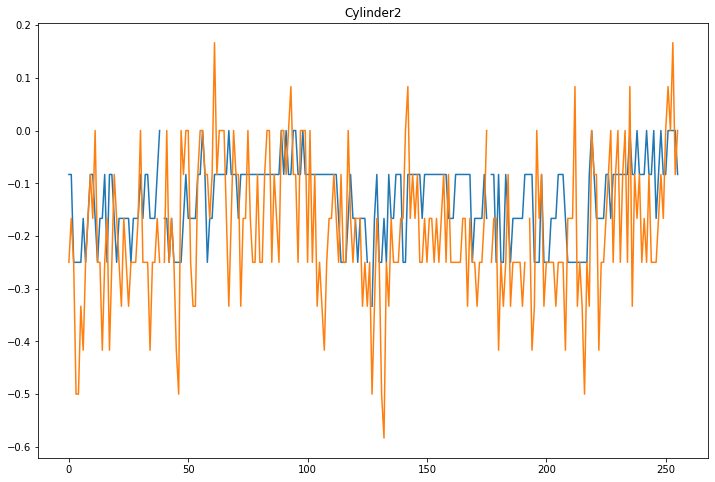

In [19]:
plt.figure(figsize=(12,8))
plt.title("Cylinder2")
plt.plot(range(256),(Y2))
plt.plot(range(256),(X2))

In [20]:
bad_cyl2 = ~np.logical_or(np.isnan(X2), np.isnan(Y2))

X2_nan=np.compress(bad_cyl2, X2)  
Y2_nan=np.compress(bad_cyl2, Y2) 

relation2=np.corrcoef(X2_nan,Y2_nan)[1,0]
print(relation2)

0.37189798980007277


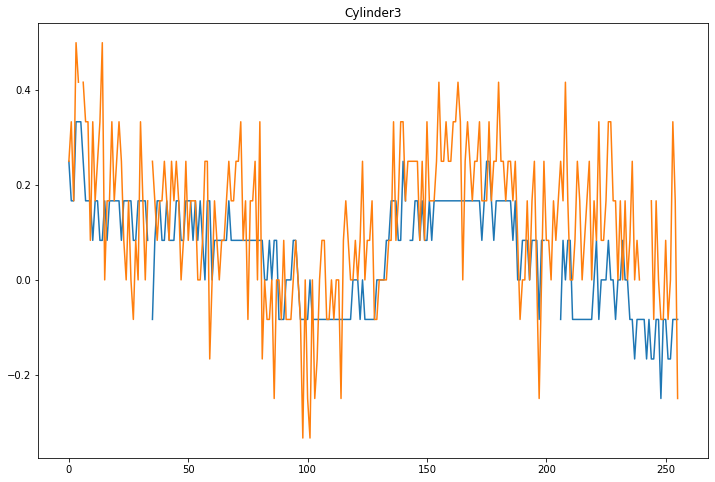

In [21]:
plt.figure(figsize=(12,8))
plt.title("Cylinder3")
plt.plot(range(256),(Y3))
plt.plot(range(256),(X3))

In [22]:
bad_cyl3 = ~np.logical_or(np.isnan(X3), np.isnan(Y3))

X3_nan=np.compress(bad_cyl3, X3)  
Y3_nan=np.compress(bad_cyl3, Y3) 

relation3=np.corrcoef(X3_nan,Y3_nan)[1,0]
print(relation3)

0.514598692751857


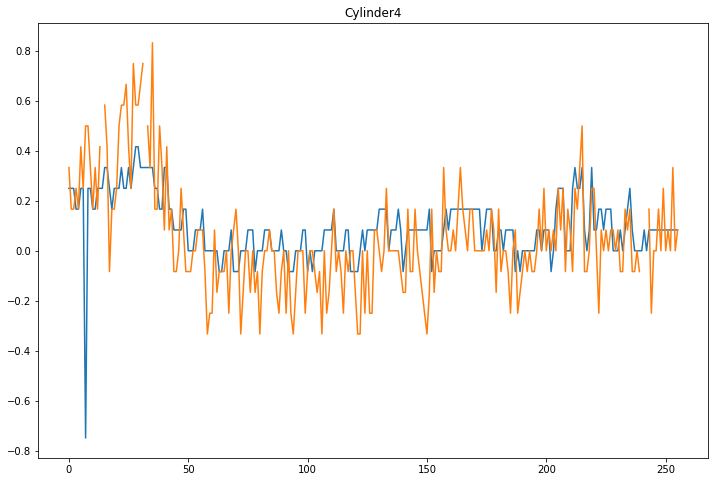

In [23]:
plt.figure(figsize=(12,8))
plt.title("Cylinder4")
plt.plot(range(256),(Y4))
plt.plot(range(256),(X4))

In [24]:
bad_cyl4 = ~np.logical_or(np.isnan(X4), np.isnan(Y4))

X4_nan=np.compress(bad_cyl4, X4)  
Y4_nan=np.compress(bad_cyl4, Y4) 

relation4=np.corrcoef(X4_nan,Y4_nan)[1,0]
print(relation4)

0.5745315227341491
